# DeepPokemon

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
sns.set_style("dark")
import plotly.graph_objects as go

Import the dataset

In [6]:
file=('/Users/helenamargarida/Desktop/PokeML/Pokemon.csv')
database=pd.read_csv(file)

In [7]:
database.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Some Pokemons don't have a Type 2. We must adress these missing values.

In [8]:
database=database.fillna(value={'Type 2':'None'})
database.drop(['#'],axis=1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


I am also going to convert the Legendary property to binary

In [9]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
database['Legendary'] = labelencoder.fit_transform(database['Legendary'])

Let's show the Legendary Pokemon

In [10]:
Legendaries=np.array(database[database['Legendary']==1].Name)
Legendaries.size

65

We can use .describe() to explore the data

In [11]:
database.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


So, for example, there are 800 pokemons, from generation 1 to 6. The mean Total points is 435, the weakest being 180 and the strongest 780. Which pokemons are these?

In [12]:
weakest=database.iloc[database['Total'].idxmin,:].Name

strongest=np.array(database[database['Total']==database['Total'].max()].Name)
print('The weakest pokemon overall is',weakest,'and the strongest are',strongest)

The weakest pokemon overall is Sunkern and the strongest are ['MewtwoMega Mewtwo X' 'MewtwoMega Mewtwo Y' 'RayquazaMega Rayquaza']


What about the starters? How do they compare?

In [13]:
starters=database[database['Name'].isin(['Bulbasaur','Squirtle','Charmander'])]
starters

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0
9,7,Squirtle,Water,None,314,44,48,65,50,64,43,1,0


In [14]:
bulbasaur_stats=np.array(starters.iloc[0,5:11])
charmander_stats=np.array(starters.iloc[1,5:11])
squirtle_stats=np.array(starters.iloc[2,5:11])


categories = database.columns.drop(['Total','Type 1','Type 2','Name','Generation','Legendary'])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=bulbasaur_stats,
      theta=categories,
      fill='toself',
      name='Bulbasaur',
      marker_color='#2ca02c',
      opacity=0.6
))
fig.add_trace(go.Scatterpolar(
      r=charmander_stats,
      theta=categories,
      fill='toself',
      name='Charmander',
      marker_color='tomato',
      opacity=0.6
))

fig.add_trace(go.Scatterpolar(
      r=squirtle_stats,
      theta=categories,
      fill='toself',
      name='Squirtle',
      marker_color='cornflowerblue',
      opacity=0.7
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=False
)

fig.show()


Turns out Charmander is not that much greater than I thought as a kid. This of course derives from the fact that, as a kid, everything related to fire was stronger. Is this really true? What type is stronger on average?

‘Total’ column is the sum of all the stats values, and I think it is a good indicator of overall stats of a Pokemon. So, let’s see how ‘Total’ values are distributed across Pokemons within type.

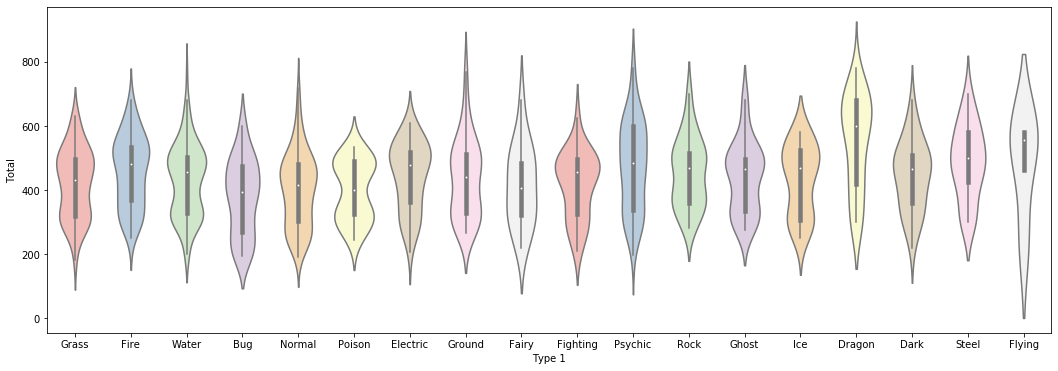

In [16]:
plt.figure(figsize=(18,6))
sns.axes_style("darkgrid"):
sns.violinplot(x='Type 1',y='Total',data=database,palette="Pastel1");